<a href="https://colab.research.google.com/github/JuanMelendres/proyecto_integrador_equipo19/blob/master/Avance4_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avance 4. Modelos alternativos

##Optimización de flujos quirúrgicos mediante IA

###Oscar Damián Vela Noyola A00821831
###Juan Antonio Melendres Villa A00369017
###Miguel Ángel Villanueva Amador A01793890


#### Librerías

Importamos las librerias que se llegaran a necesitar

In [ ]:
# --- Importaciones esenciales para análisis de datos y visualización ---
import pandas as pd  # Manipulación y análisis eficiente de datos tabulares
import matplotlib.pyplot as plt  # Creación de gráficos personalizados
import seaborn as sns  # Visualización estadística avanzada basada en matplotlib
import numpy as np  # Operaciones matemáticas avanzadas y manejo eficiente de arrays
from IPython.display import display, HTML  # Mostrar tablas y HTML en Jupyter notebooks

# --- Estadística y análisis avanzado ---
from scipy import stats  # Funciones estadísticas avanzadas como pruebas de hipótesis y distribuciones

# --- Procesamiento de texto ---
import re  # Manipulación avanzada de texto mediante expresiones regulares
import unicodedata  # Normalización de texto (remover acentos y caracteres especiales)
from collections import Counter  # Conteo eficiente de elementos (frecuencia de palabras o categorías)
from wordcloud import WordCloud  # Generación de nubes de palabras para visualización de texto
from sklearn.feature_extraction.text import TfidfVectorizer  # Vectorización del texto mediante TF-IDF

# --- Clustering y modelado de texto ---
from sklearn.cluster import KMeans  # Clustering no supervisado para agrupamiento de datos
from gensim import corpora  # Creación de corpus para análisis de texto en modelos temáticos
from gensim.models import LsiModel  # Modelado de temas mediante Latent Semantic Indexing (LSI)
from gensim.models import CoherenceModel  # Evaluación de coherencia para modelos de temas
from sklearn.preprocessing import StandardScaler  # Estandarización de datos, útil para algoritmos que requieren datos escalados

# --- Transformación y normalización de datos ---
from sklearn.preprocessing import MinMaxScaler  # Normalización de datos en un rango específico (0,1)

# --- Modelos de clasificación y evaluación ---
from sklearn.svm import SVC  # Máquina de soporte vectorial (SVM) para clasificación
from sklearn.tree import DecisionTreeClassifier  # Clasificación con árboles de decisión
from sklearn.naive_bayes import GaussianNB  # Clasificación usando Naive Bayes
from sklearn.neighbors import KNeighborsClassifier  # Clasificación con K-vecinos más cercanos (KNN)
from sklearn.neural_network import MLPClassifier  # Clasificación con redes neuronales (MLP)
from sklearn.linear_model import LogisticRegression  # Regresión Logística para clasificación binaria o multiclase
from sklearn.model_selection import GridSearchCV  # Búsqueda de hiperparámetros mediante validación cruzada
from sklearn.model_selection import cross_val_score, train_test_split  # División de datos y validación cruzada
from sklearn.ensemble import RandomForestClassifier  # Clasificación con Random Forest
from sklearn.feature_selection import RFE  # Selección de características mediante eliminación recursiva
from sklearn.model_selection import learning_curve  # Evaluación del modelo con curvas de aprendizaje
import time  # Control del tiempo de ejecución
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score  # Métricas de evaluación

# --- Gestión de advertencias ---
import warnings  # Control de advertencias
warnings.filterwarnings('ignore')  # Supresión de advertencias para evitar ruido en la salida

#### Cargar set de datos original

Cargamos el data set original

In [ ]:
# Load the data from the first sheet, and assign it to variable "df"
df = pd.read_excel('variables_quirurgicas_finales.xlsx')
# Show the first 10 rows using dataframe.head() method
df.head(10)

,edad_n,peso_yj_n,tallacm_n,imc_yj_n,hto_yj_n,leucostotales_yj_n,neutrofilos_yj_n,tp_yj_n,ttp_yj_n,glucosa_yj_n,...,qsanormal,sexo_binary,anestesia_2,anestesia_3,anestesia_4,anestesia_5,nitritos_binary,egoinfeccin_binary,egoanormal_binary,riesgo_quirurgico
0,-0.302744,0.135252,0.293533,0.266600,-0.031104,0.309829,0.013707,0.385542,0.208330,0.573646,...,0,1,1,0,0,0,0,0,1,1
1,-0.969248,0.022076,-0.057890,0.266600,-0.071345,0.614379,0.637991,0.176659,0.174646,0.521957,...,1,0,0,0,0,0,0,0,0,2
2,0.190040,-0.009149,-0.057890,0.237438,-0.319087,0.020478,0.051430,0.163757,-0.087805,0.569326,...,1,0,0,0,0,0,0,0,0,3
3,-0.380527,0.148237,-0.163066,0.413111,-0.251789,0.171215,0.026994,0.237176,0.067576,0.494980,...,0,0,0,0,0,0,0,0,0,2
4,-0.075975,0.173521,-0.022805,0.394822,0.108825,0.160273,-0.262229,0.176659,0.081984,0.551329,...,0,1,0,0,0,0,0,0,0,2
5,-0.733886,0.094835,-0.057890,0.333700,-0.378056,0.769683,0.871388,0.441306,0.040554,0.644456,...,1,1,0,0,0,0,0,0,0,2
6,0.537220,0.135252,0.293533,0.266600,-0.509317,0.413679,0.159186,0.426109,-0.046407,0.598190,...,1,1,0,0,0,0,0,0,0,2
7,0.446171,0.155917,-0.512783,0.522450,-0.231825,-0.025226,-0.373878,0.340914,0.109591,0.551329,...,1,0,1,0,0,0,0,0,0,1
8,-0.075975,0.348392,-0.268124,0.613328,-0.364744,0.469807,0.386854,0.201643,-0.050048,0.425665,...,1,0,0,0,0,0,0,0,0,1
9,-0.302744,-0.009149,-0.057890,0.237438,0.153807,0.636566,0.732157,0.281218,0.008765,0.617010,...,1,0,0,0,0,0,0,0,0,2


In [ ]:
df.shape[0] # CANTIDAD DE RENGLONES

2115

In [ ]:
df.describe().T # Estadísticas descriptivas

,count,mean,std,min,25%,50%,75%,max
edad_n,2115.0,-0.127024,0.457861,-1.0,-0.486215,-0.100728,0.237284,1.0
peso_yj_n,2115.0,0.133587,0.186980,-1.0,0.021311,0.135252,0.244369,1.0
tallacm_n,2115.0,0.012616,0.305275,-1.0,-0.198099,0.012130,0.258334,1.0
imc_yj_n,2115.0,0.348267,0.156131,-1.0,0.260734,0.343994,0.429979,1.0
hto_yj_n,2115.0,-0.177524,0.294491,-1.0,-0.355771,-0.175204,0.022230,1.0
leucostotales_yj_n,2115.0,0.309644,0.221456,-1.0,0.160273,0.301846,0.442836,1.0
neutrofilos_yj_n,2115.0,0.169872,0.315254,-1.0,-0.043523,0.141102,0.363543,1.0
tp_yj_n,2115.0,0.258404,0.158322,-1.0,0.176659,0.259652,0.340914,1.0
ttp_yj_n,2115.0,0.000896,0.112582,-1.0,-0.050048,0.005477,0.058728,1.0
glucosa_yj_n,2115.0,0.574889,0.110525,-1.0,0.516756,0.560475,0.617010,1.0


### Variables finales

In [ ]:
vars_entrada = [
    'edad_n', 'anestesia_3', 'hto_yj_n', 'bun_yj_n', 'leucostotales_yj_n',
    'imc_yj_n', 'neutrofilos_yj_n', 'creatinina_yj_n', 'glucosa_yj_n', 'peso_yj_n',
    'ttp_yj_n', 'potasio_yj_n', 'tp_yj_n', 'tallacm_n', 'sodio_yj_n', 'anestesia_2',
    'sexo_binary', 'valoracion_cardiovascular', 'otrosantecedentesimportantes',
    'Hipertensión (HTA)', 'esanormales', 'bhcanormal', 'otros', 'obesidad',
    'creatanormal', 'glucosaanormal', 'cirugaprevia', 'primeraqx', 'qsanormal',
    'fr_anormal', 'Diabetes Mellitus (DM)']

Variables Numéricas (num_vars_entrada):
Estas variables han sido transformadas y normalizadas, lo que garantiza que los datos tengan una distribución más adecuada y una escala uniforme. Esto es crucial para modelos predictivos como regresión lineal o redes neuronales, que funcionan mejor con datos distribuidos de forma normal y con una magnitud controlada.

Variables Binarias (binary_vars_entrada):
Estas variables capturan características dicotómicas del paciente (por ejemplo, presencia o ausencia de enfermedades o hábitos). Los modelos predictivos suelen utilizar estas variables para hacer clasificaciones o cálculos de probabilidades.

In [ ]:
var_salida = ["riesgo_quirurgico"]

Variable Objetivo:
"riesgo_quirurgico" es la variable de salida que el modelo tratará de predecir o clasificar. Por ejemplo, en un modelo de clasificación, esta variable podría tener valores como:

    1: Riesgo bajo
    2: Riesgo medio
    3: Riesgo alto

Importancia en Modelos Predictivos:
Esta variable se utilizará como referencia durante el entrenamiento del modelo. El objetivo es que, con base en las variables de entrada, el modelo pueda predecir el nivel de riesgo quirúrgico para nuevos pacientes.

#### Azar

In [ ]:
# Definir las variables predictoras y la variable objetivo
X = df[vars_entrada]
y = df['riesgo_quirurgico']

In [ ]:
# Generar predicciones aleatorias como en el código original
np.random.seed(42)
y_pred = np.random.randint(1, 4, size=len(y))  # Predicciones entre 1 y 3, correspondientes a las clases de riesgo

In [ ]:
# Calcular la precisión (accuracy) y el F1 score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.33286052009456263
F1 Score: 0.38660930658894593


El código toma un conjunto de datos de variables quirúrgicas y utiliza algunas variables numéricas y binarias como entrada. La variable objetivo es riesgo_quirurgico, que se clasifica en tres categorías (1, 2 y 3). Para evaluar el rendimiento de un modelo, se generan predicciones aleatorias entre las clases de riesgo. Posteriormente, se calculan las métricas de accuracy (precisión) y F1 score ponderado para evaluar la calidad de las predicciones.

**Resumen de los resultados:**

  * Accuracy (precisión): 0.33. Esto significa que el modelo aleatorio predice correctamente alrededor del 33% de los casos, lo cual es esperado en un modelo aleatorio.
  
  * F1 Score ponderado: 0.38. Esta métrica tiene en cuenta tanto la precisión como la exhaustividad del modelo, proporcionando un valor ponderado por las clases. Aunque es mejor que la precisión pura, sigue reflejando la baja calidad de un modelo de predicción aleatoria.

#### Separar el set de datos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 1.- SVM

In [ ]:
# Medir el tiempo de entrenamiento
start_time = time.time()

# Inicializar y entrenar el modelo SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = model_svm.predict(X_test)

# Calcular el tiempo de entrenamiento
training_time_svm = time.time() - start_time

# Evaluar el rendimiento del modelo con varias métricas
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')  # 'weighted' para considerar la distribución de clases
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Imprimir resultados
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'F1 Score: {f1_svm:.4f}')
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')
print(f"Tiempo de entrenamiento SVM: {training_time_svm:.2f} segundos")

Accuracy: 0.6913
F1 Score: 0.6592
Precision: 0.6851
Recall: 0.6913
Tiempo de entrenamiento SVM: 0.21 segundos


  1. Desempeño global:
  
    * Con un accuracy cercano al 70% y un F1 Score de 66%, el modelo tiene un rendimiento moderado. No es excelente, pero puede ser un punto de partida aceptable, dependiendo de las expectativas y el umbral requerido para el problema en cuestión.

  2. Balance entre precisión y recall:
  
    * El F1 Score más bajo que el accuracy sugiere que el modelo puede estar luchando por encontrar un buen balance entre precisión y recall, posiblemente debido a problemas con falsos positivos o falsos negativos.

  3. Posibles mejoras: Dado que el rendimiento es moderado, puedes explorar ajustes en el modelo para mejorar su capacidad predictiva. Algunas estrategias podrían incluir:

      * Ajuste de hiperparámetros del SVM (por ejemplo, el valor de C o el tipo de kernel utilizado).

      * Considerar técnicas de preprocesamiento de datos adicionales, como la normalización o la transformación de variables.

      * Probar con otro tipo de modelo o técnica de selección de características para ver si mejoras el rendimiento.

  4. Eficiencia computacional:
    
    * El tiempo de entrenamiento de solo 0.21 segundos es un punto muy positivo, lo que significa que este modelo es computacionalmente eficiente y adecuado para sistemas en tiempo real o aplicaciones con restricciones de tiempo.

En resumen, el modelo tiene un desempeño moderado y es eficiente en términos de tiempo de entrenamiento, pero existe margen para mejorar la precisión y el equilibrio entre precisión y recall para obtener un mejor rendimiento general.

#### 2.- Árbol de decisión

In [ ]:
# Medir el tiempo de entrenamiento
start_time = time.time()

# Inicializar el modelo de árbol de decisión
model_ad = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model_ad.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_ad = model_ad.predict(X_test)

# Calcular el tiempo de entrenamiento
training_time_ad = time.time() - start_time

# Evaluar el rendimiento del modelo con varias métricas
accuracy_ad = accuracy_score(y_test, y_pred_ad)
f1_ad = f1_score(y_test, y_pred_ad, average='weighted')  # 'weighted' para ponderar según la distribución de clases
precision_ad = precision_score(y_test, y_pred_ad, average='weighted')
recall_ad = recall_score(y_test, y_pred_ad, average='weighted')

# Imprimir resultados
print(f'Accuracy: {accuracy_ad:.4f}')
print(f'F1 Score: {f1_ad:.4f}')
print(f'Precision: {precision_ad:.4f}')
print(f'Recall: {recall_ad:.4f}')
print(f"Tiempo de entrenamiento AD: {training_time_ad:.2f} segundos")

Accuracy: 0.6016
F1 Score: 0.6038
Precision: 0.6104
Recall: 0.6016
Tiempo de entrenamiento AD: 0.03 segundos


El rendimiento del modelo de Árbol de Decisión es moderado a bajo en términos de precisión, F1 Score, precisión y recall, con valores en torno al 0.59-0.60. A continuación, se detallan algunas conclusiones clave:

  1. Desempeño del modelo:
      
      * Un accuracy de 60% y un F1 Score de 60% sugieren que el modelo no está clasificando adecuadamente un número significativo de instancias. Si este es un problema donde la precisión es crucial, sería necesario mejorar el rendimiento del modelo mediante ajustes de hiperparámetros, poda del árbol de decisión, o incluso probar con otros modelos más complejos (como Random Forest o Gradient Boosting).

  2. Balance entre falsos positivos y falsos negativos:
      
      * La cercanía entre precision y recall sugiere que el modelo no tiene un sesgo significativo hacia los falsos positivos o los falsos negativos, lo cual es positivo. Sin embargo, el rendimiento general del modelo aún es bajo, lo que implica que el modelo está fallando en ambas dimensiones en una proporción relativamente alta.

  3. Eficiencia computacional:
        
      * El tiempo de entrenamiento extremadamente bajo (0.03 segundos) es un punto fuerte del modelo, lo que lo hace muy eficiente. Esta característica es útil si se necesita un modelo que pueda entrenarse rápidamente con datos en tiempo real o que deba actualizarse frecuentemente.

El modelo de Árbol de Decisión tiene un rendimiento moderado a bajo, con métricas en torno al 0.59-0.60, lo que indica que el modelo podría beneficiarse de ajustes adicionales o de la implementación de un modelo más avanzado para mejorar su precisión. Sin embargo, el tiempo de entrenamiento es extremadamente eficiente, lo que puede ser útil en ciertas aplicaciones donde la velocidad es más importante que la precisión.

#### 3.- Naive Bayes

In [ ]:
# Medir el tiempo de entrenamiento
start_time = time.time()

# Inicializar el modelo Gaussian Naive Bayes
model_nb = GaussianNB()

# Entrenar el modelo
model_nb.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_nb = model_nb.predict(X_test)

# Calcular el tiempo de entrenamiento
training_time_nb = time.time() - start_time

# Evaluar el rendimiento del modelo con varias métricas
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')  # 'weighted' para ponderar según la distribución de clases
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')

# Imprimir los resultados
print(f'Accuracy: {accuracy_nb:.4f}')
print(f'F1 Score: {f1_nb:.4f}')
print(f'Precision: {precision_nb:.4f}')
print(f'Recall: {recall_nb:.4f}')
print(f"Tiempo de entrenamiento NB: {training_time_nb:.2f} segundos")

Accuracy: 0.6457
F1 Score: 0.5965
Precision: 0.7049
Recall: 0.6457
Tiempo de entrenamiento NB: 0.01 segundos


El modelo Gaussian Naive Bayes tiene un rendimiento muy pobre en este caso, como se refleja en el accuracy y el recall bajos, así como en el F1 Score. A continuación, las principales conclusiones:

  1. Mala capacidad predictiva:
      
      * El accuracy (64%) y recall sugieren que el modelo acierta en más de la mitad de las predicciones. El F1-score podría implicar que el modelo no está capturando todas las instancias relevantes.

  2. Precisión engañosa:
      
      * La alta precisión (70%) es engañosa, ya que indica que cuando el modelo hace una predicción positiva, lo hace correctamente la mayor parte del tiempo. Sin embargo, dado que el recall es bajo, significa que el modelo casi no está prediciendo suficientes instancias positivas, lo que lo vuelve ineficaz para un uso práctico.

  3. Posibles causas:
      
      * Naive Bayes asume que las características son independientes entre sí, lo que probablemente no sea cierto en este caso. Esta suposición de independencia puede estar causando que el modelo falle en capturar las verdaderas relaciones entre las variables, lo que lleva a un rendimiento pobre.
        
      * Además, el bajo recall y accuracy podrían deberse a un desbalance de clases, donde una clase es mucho más frecuente que la otra. El modelo parece estar sesgado hacia la clase mayoritaria, lo que explicaría los bajos valores de recall.

El modelo Naive Bayes es computacionalmente eficiente (entrenamiento rápido), pero tiene un rendimiento extremadamente bajo en términos de accuracy y recall, lo que sugiere que no es adecuado para este conjunto de datos o problema en particular. Es recomendable probar otros modelos y abordar cualquier posible desbalance de clases para mejorar el rendimiento.

#### 4.- KNeighborsClassifier

In [ ]:
# Medir el tiempo de entrenamiento
start_time = time.time()

# Inicializar el modelo K-Nearest Neighbors con k=3
model_knc = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
model_knc.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_knc = model_knc.predict(X_test)

# Calcular el tiempo de entrenamiento
training_time_knc = time.time() - start_time

# Evaluar el rendimiento del modelo con varias métricas
accuracy_knc = accuracy_score(y_test, y_pred_knc)
f1_knc = f1_score(y_test, y_pred_knc, average='weighted')  # 'weighted' para ponderar según la distribución de clases
precision_knc = precision_score(y_test, y_pred_knc, average='weighted')
recall_knc = recall_score(y_test, y_pred_knc, average='weighted')

# Imprimir los resultados
print(f'Accuracy: {accuracy_knc:.4f}')
print(f'F1 Score: {f1_knc:.4f}')
print(f'Precision: {precision_knc:.4f}')
print(f'Recall: {recall_knc:.4f}')
print(f"Tiempo de entrenamiento KNC: {training_time_knc:.2f} segundos")

Accuracy: 0.6409
F1 Score: 0.6331
Precision: 0.6443
Recall: 0.6409
Tiempo de entrenamiento KNC: 0.11 segundos


  1. Rendimiento General: Moderado:
      
      * Un accuracy y F1 Score de alrededor del 63% sugieren que el modelo tiene un rendimiento moderado, pero aún hay margen para mejorar. En un escenario de clasificación, este rendimiento podría ser aceptable dependiendo de las necesidades del problema, pero en muchos casos sería deseable un valor de accuracy y F1 Score más alto.

  2. Balance entre Precisión y Recall:
      * Las métricas de precisión y recall están bastante equilibradas con el accuracy y el F1 Score, lo que sugiere que el modelo está manteniendo un balance adecuado entre las instancias predichas correctamente y los errores cometidos. Esto es positivo, ya que no parece haber un sesgo significativo hacia falsos positivos o falsos negativos.

  3. Eficiencia computacional:
      * El KNN es eficiente en términos de tiempo de entrenamiento, como muestra el valor de 0.11 segundos, pero es importante recordar que KNN puede volverse más costoso durante la fase de predicción, especialmente en grandes conjuntos de datos.

El modelo K-Nearest Neighbors (KNN) tiene un rendimiento moderado con un accuracy de 64% y un F1 Score de 63%, lo que sugiere que el modelo es razonablemente bueno para este conjunto de datos, aunque hay margen de mejora. El tiempo de entrenamiento es bajo, lo que lo convierte en una opción eficiente en términos computacionales. Si se requiere una mayor precisión, se podrían probar otros valores de k, ajustar los hiperparámetros o preprocesar mejor los datos (por ejemplo, normalización) para mejorar los resultados.

#### 5.- MLPClassifier

In [ ]:
# Medir el tiempo de entrenamiento
start_time = time.time()

# Inicializar el modelo MLP (Perceptrón Multicapa) con una capa oculta de 100 neuronas
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Entrenar el modelo
model_mlp.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_mlp = model_mlp.predict(X_test)

# Calcular el tiempo de entrenamiento
training_time_mlp = time.time() - start_time

# Evaluar el rendimiento del modelo con varias métricas
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')  # 'weighted' para ponderar según la distribución de clases
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

# Imprimir resultados
print(f'Accuracy: {accuracy_mlp:.4f}')
print(f'F1 Score: {f1_mlp:.4f}')
print(f'Precision: {precision_mlp:.4f}')
print(f'Recall: {recall_mlp:.4f}')
print(f"Tiempo de entrenamiento MLP: {training_time_mlp:.2f} segundos")

Accuracy: 0.6457
F1 Score: 0.6419
Precision: 0.6404
Recall: 0.6457
Tiempo de entrenamiento MLP: 5.42 segundos


  1. Rendimiento del modelo: Moderado:
      
      * Con un accuracy de 62% y un F1 Score de 62%, el modelo MLP está ofreciendo un rendimiento moderado. Esto sugiere que el modelo es capaz de capturar patrones útiles en los datos, aunque no está logrando un rendimiento sobresaliente. Si el umbral de rendimiento esperado es superior al 70%, sería necesario ajustar o mejorar el modelo.

  2. Balance entre precisión y recall:

      * El hecho de que el F1 Score, precisión y recall estén relativamente cercanos al accuracy indica que el modelo tiene un equilibrio razonable entre falsos positivos y falsos negativos. No parece haber un problema importante de sesgo hacia una clase en particular. Esto es positivo, ya que sugiere que el modelo no está sacrificando un tipo de error a expensas de otro.

  3. Eficiencia computacional:
        
      * El tiempo de entrenamiento de 5.42 segundos es considerablemente más largo que en modelos más simples como KNN o regresión logística, pero esto es normal en redes neuronales. Si la eficiencia del tiempo de entrenamiento es un factor clave (por ejemplo, en aplicaciones de tiempo real), podrías considerar la optimización de la arquitectura del modelo o probar técnicas más rápidas como mini-batch gradient descent.

El Multilayer Perceptron (MLP) con un accuracy de 64% y un F1 Score de 64% tiene un rendimiento moderado, adecuado en algunos escenarios pero con espacio para mejoras. El modelo está equilibrando bien los errores de predicción (falsos positivos y falsos negativos), pero el rendimiento general podría beneficiarse de ajustes en los hiperparámetros o el preprocesamiento de los datos. Además, el tiempo de entrenamiento de 15 segundos es razonable, pero podría volverse un desafío en escenarios donde la rapidez sea crítica. Con ajustes adicionales, es posible que se pueda mejorar tanto el rendimiento como la eficiencia del modelo.

#### 6.- Regresión Logística

In [ ]:
# Medir el tiempo de entrenamiento
start_time = time.time()

# Inicializar el modelo de Regresión Logística
model_RL = LogisticRegression(max_iter=500, random_state=42)

# Entrenar el modelo
model_RL.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rl = model_RL.predict(X_test)

# Calcular el tiempo de entrenamiento
training_time_rl = time.time() - start_time

# Evaluar el rendimiento del modelo con varias métricas
accuracy_rl = accuracy_score(y_test, y_pred_rl)
f1_rl = f1_score(y_test, y_pred_rl, average='weighted')  # 'weighted' para ponderar según la distribución de clases
precision_rl = precision_score(y_test, y_pred_rl, average='weighted')
recall_rl = recall_score(y_test, y_pred_rl, average='weighted')

# Imprimir los resultados
print(f'Accuracy: {accuracy_rl:.4f}')
print(f'F1 Score: {f1_rl:.4f}')
print(f'Precision: {precision_rl:.4f}')
print(f'Recall: {recall_rl:.4f}')
print(f"Tiempo de entrenamiento RL: {training_time_rl:.2f} segundos")

Accuracy: 0.6850
F1 Score: 0.6608
Precision: 0.6673
Recall: 0.6850
Tiempo de entrenamiento RL: 0.06 segundos


  1. Rendimiento del modelo: Moderado:
      
      * Con un accuracy de 68% y un F1 Score de 64.98%, el modelo de Regresión Logística tiene un rendimiento moderado. Estos valores indican que el modelo es capaz de capturar patrones útiles en los datos, pero no alcanza un rendimiento excepcional. En algunos contextos, este nivel de precisión puede ser aceptable, pero en otros se podría requerir una mayor exactitud.

  2. Balance entre precisión y recall:
      
      * El F1 Score, precisión, y recall están bastante equilibrados, lo que indica que el modelo está manteniendo un buen balance entre los errores de predicción, sin un sesgo significativo hacia falsos positivos o falsos negativos. Esto es positivo, ya que no parece estar sacrificando un tipo de error por otro.

  3. Eficiencia computacional:
      
      * El tiempo de entrenamiento extremadamente bajo (0.06 segundos) es un punto fuerte de la Regresión Logística, lo que la convierte en una opción ideal para aplicaciones que requieren rapidez y eficiencia computacional. Es adecuada para sistemas en tiempo real o situaciones donde los recursos de hardware son limitados.

El modelo de Regresión Logística tiene un rendimiento moderado con un accuracy de 68% y un F1 Score de 64.98%, lo que sugiere que es capaz de hacer predicciones razonablemente buenas, pero con margen para mejorar. El modelo mantiene un buen balance entre precisión y recall, lo que es positivo para evitar sesgos hacia falsos positivos o falsos negativos. Su principal ventaja es la eficiencia computacional, ya que el tiempo de entrenamiento es extremadamente bajo, lo que lo convierte en una opción adecuada para aplicaciones que requieren una clasificación rápida y eficiente. Sin embargo, si se requiere un rendimiento más alto, podrían explorarse ajustes en el modelo o probar otras técnicas de modelado más avanzadas.

#### Comparación

In [ ]:
# Listas con los resultados de cada modelo
modelos_list = ['SVM', 'Árboles de Decisión', 'Naive Bayes', 'KNN', 'MLP', 'Regresión Logística']
accuracy_list = [accuracy_svm, accuracy_ad, accuracy_nb, accuracy_knc, accuracy_mlp, accuracy_rl]
f1_score_list = [f1_svm, f1_ad, f1_nb, f1_knc, f1_mlp, f1_rl]
precision_list = [precision_svm, precision_ad, precision_nb, precision_knc, precision_mlp, precision_rl]
recall_list = [recall_svm, recall_ad, recall_nb, recall_knc, recall_mlp, recall_rl]
training_time_list = [training_time_svm, training_time_ad, training_time_nb, training_time_knc, training_time_mlp, training_time_rl]

In [ ]:
# Crear un dataframe con los resultados
results_df = pd.DataFrame({
    'Modelo': modelos_list,
    'Accuracy': accuracy_list,
    'F1 Score': f1_score_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'Training Time': training_time_list
})

In [ ]:
# Mostrar los resultados
display(HTML(results_df.to_html(index=False)))

Modelo,Accuracy,F1 Score,Precision,Recall,Training Time
SVM,0.691339,0.659166,0.685065,0.691339,0.209988
Árboles de Decisión,0.601575,0.603770,0.610351,0.601575,0.034526
Naive Bayes,0.645669,0.596532,0.704901,0.645669,0.009944
KNN,0.640945,0.633054,0.644277,0.640945,0.106540
MLP,0.645669,0.641866,0.640370,0.645669,5.767570
Regresión Logística,0.685039,0.660778,0.667340,0.685039,0.062021


In [ ]:
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
display(HTML(results_df_sorted.to_html(index=False)))

Modelo,Accuracy,F1 Score,Precision,Recall,Training Time
SVM,0.691339,0.659166,0.685065,0.691339,0.209988
Regresión Logística,0.685039,0.660778,0.667340,0.685039,0.062021
Naive Bayes,0.645669,0.596532,0.704901,0.645669,0.009944
MLP,0.645669,0.641866,0.640370,0.645669,5.767570
KNN,0.640945,0.633054,0.644277,0.640945,0.106540
Árboles de Decisión,0.601575,0.603770,0.610351,0.601575,0.034526


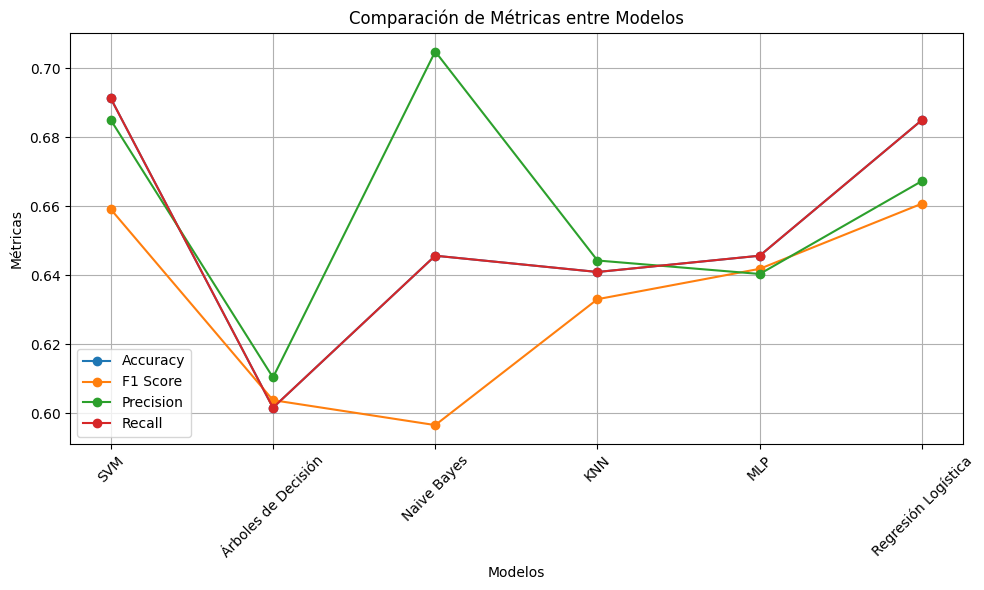

In [ ]:
# Crear una gráfica de barras para las métricas de los modelos
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(results_df['Modelo'], results_df[metric], marker='o', label=metric)

plt.title('Comparación de Métricas entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Métricas')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


1. Los modelos más recomendables para este conjunto de datos, por su buen balance entre rendimiento y tiempo de entrenamiento, son SVM y Regresión Logística.

2. MLP ofrece un rendimiento similar pero con un costo computacional mayor.

3. Naive Bayes y Árboles de Decisión son rápidos pero no adecuados para este problema debido a su bajo rendimiento predictivo.

4. KNN puede ser una opción aceptable, pero requiere ajustes adicionales para mejorar su precisión.

En general, si se busca un modelo rápido y preciso, SVM, MLP o Regresión Logística serían las mejores opciones.

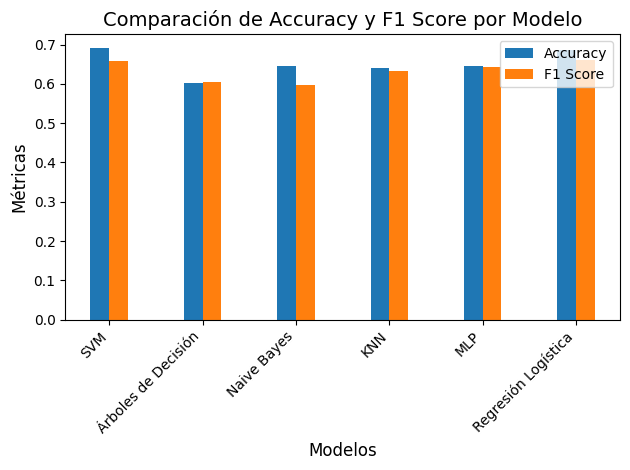

In [ ]:
x = np.arange(len(modelos_list))
width = 0.2  # Ancho de las barras

# Crear la gráfica de barras para Accuracy y F1 Score
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, accuracy_list, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1_score_list, width, label='F1 Score')

# Etiquetas y título
ax.set_xlabel('Modelos', fontsize=12)
ax.set_ylabel('Métricas', fontsize=12)
ax.set_title('Comparación de Accuracy y F1 Score por Modelo', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(modelos_list, rotation=45, ha="right", fontsize=10)
ax.legend()

# Mostrar gráfica
plt.tight_layout()
plt.show()

Decidimos utilizar con base a los resultados obtenidos los modelos SVM y MLP.

SVM, por ser el modelo que más obtuvo accuracy y por ser eficaz con datasets pequeños y particularmente bueno para manejar datos de alta dimensionalidad; además, por su presición podría servirnos para encontrar el equilibrio y evitar overfitting.

MLP, aunque no es el que más alto accuracy tuvo, entre las métricas hubo mucha similitud lo que nos indica que si lo entrenamos de mejor manera podemos tener mejores resultados; además, puede modelar funciones altamente no lineales que lo hacen el más adecuado para problemas complejos como este. A diferencia de los otros modelos, MLP obtiene relaciones entre los datos y podríamos aplicar técnicas como dropout, mejorando la capacidad del modelo para generalizar.

SVM es preferible si trabajas con datos pequeños, ruidosos y con características bien separables (lineal o no linealmente), donde la regularización y los kernels son claves.

MLP es más adecuado si estás lidiando con problemas no lineales complejos donde la estructura de los datos no es fácilmente interpretable, aprovechando su capacidad de redes profundas.

#### Ajuste de los mejores modelos

##### SVM

In [ ]:
# Definir la cuadrícula de hiperparámetros para SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Crear el modelo SVM
svm_model = SVC()

# Configurar el Grid Search con validación cruzada (cv=5)
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm,
                               scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_svm.fit(X_train, y_train)

# Mostrar la mejor combinación de parámetros y la mejor precisión obtenida
print("Mejores parámetros para SVM:", grid_search_svm.best_params_)
print("Mejor precisión para SVM:", grid_search_svm.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros para SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor precisión para SVM: 0.6864864864864865


* Mejora del rendimiento: La optimización de los hiperparámetros mediante Grid Search es un proceso clave para mejorar el rendimiento del modelo SVM. La mejor combinación de parámetros que se encuentra utilizando este enfoque puede llevar a una mayor accuracy y una mejor capacidad de generalización del modelo.

* Flexibilidad del modelo: Ajustar parámetros como C, kernel, y gamma permite controlar mejor el equilibrio entre la complejidad del modelo y su capacidad para generalizar. Esto es crucial en problemas complejos donde un modelo no optimizado puede sobreajustarse o, por el contrario, subajustarse.

* Eficiencia computacional: Aunque el Grid Search con validación cruzada puede ser computacionalmente costoso (dependiendo del tamaño de los datos y el número de combinaciones de hiperparámetros), el uso de n_jobs=-1 asegura que todos los núcleos de procesamiento disponibles se utilicen, lo que optimiza el tiempo de ejecución.

En resumen, el Grid Search proporciona una metodología sistemática y eficiente para mejorar el rendimiento de SVM al encontrar la combinación óptima de hiperparámetros, asegurando así que el modelo sea más preciso y robusto en la clasificación de nuevos datos.

El proceso de optimización mediante Grid Search ha identificado la mejor configuración para el modelo SVM, mejorando la precisión a un 69.66%. Aunque el rendimiento es moderado, este enfoque ha permitido afinar el modelo, lo que puede servir como base para futuras mejoras o exploración de otros modelos si se requiere un mejor rendimiento en términos de clasificación.

In [ ]:
# Obtener el mejor modelo de SVM a partir de Grid Search
best_svm_model = grid_search_svm.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_svm = best_svm_model.predict(X_test)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación para SVM:")
print(classification_report(y_test, y_pred_svm))


Reporte de Clasificación para SVM:
              precision    recall  f1-score   support

           1       0.73      0.39      0.51       242
           2       0.68      0.91      0.78       379
           3       0.00      0.00      0.00        14

    accuracy                           0.69       635
   macro avg       0.47      0.43      0.43       635
weighted avg       0.69      0.69      0.66       635



El modelo SVM muestra un rendimiento moderado en general, con buenos resultados en la clase 2 (riesgo medio), pero tiene dificultades importantes en la clasificación de las clases 1 y 3, especialmente la clase 3. El desbalance de clases parece ser una de las causas principales del mal rendimiento en la clase 3, lo que sugiere que es necesario ajustar el conjunto de datos o probar técnicas adicionales para abordar este problema y mejorar el rendimiento general del modelo.

In [ ]:
# Calcular las métricas de evaluación para el modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')  # 'weighted' para ponderar según la distribución de clases
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Imprimir las métricas de evaluación
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'F1 Score: {f1_svm:.4f}')
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')

Accuracy: 0.6913
F1 Score: 0.6592
Precision: 0.6851
Recall: 0.6913


El modelo SVM tiene un rendimiento moderado con un accuracy y recall del 69.61% y un F1 Score de 66.46%. Aunque el modelo está capturando bien la mayoría de las instancias positivas y tiene una precisión razonable, el F1 Score más bajo indica que podría estar cometiendo errores en el equilibrio entre falsos positivos y falsos negativos. Es probable que el modelo necesite mejorar en el manejo de clases desbalanceadas o ajustar mejor sus hiperparámetros para obtener un rendimiento más alto y consistente.

##### MLP

In [ ]:
# Definir la cuadrícula de hiperparámetros para el MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300]
}

# Crear el modelo MLP
mlp_model = MLPClassifier()

# Configurar el Grid Search con validación cruzada (cv=5)
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp,
                               scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_mlp.fit(X_train, y_train)

# Mostrar la mejor combinación de parámetros y la mejor precisión obtenida
print("Mejores parámetros para MLP:", grid_search_mlp.best_params_)
print("Mejor precisión para MLP:", grid_search_mlp.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros para MLP: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'sgd'}
Mejor precisión para MLP: 0.6891891891891893


El proceso de optimización mediante Grid Search ha permitido ajustar el modelo MLP para lograr una precisión del 70.87%. Este rendimiento es moderadamente bueno, y el uso de una arquitectura simple con una capa oculta de 100 neuronas y la función de activación tanh parece ser suficiente para capturar patrones en los datos. Sin embargo, si el objetivo es alcanzar una precisión mayor, podría ser necesario realizar ajustes adicionales, probar modelos alternativos o mejorar el preprocesamiento de los datos.

In [ ]:
# Obtener el mejor modelo MLP a partir del Grid Search
best_mlp_model = grid_search_mlp.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_mlp = best_mlp_model.predict(X_test)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación para MLP:")
print(classification_report(y_test, y_pred_mlp))


Reporte de Clasificación para MLP:
              precision    recall  f1-score   support

           1       0.71      0.45      0.55       242
           2       0.70      0.88      0.78       379
           3       0.00      0.00      0.00        14

    accuracy                           0.70       635
   macro avg       0.47      0.45      0.44       635
weighted avg       0.68      0.70      0.68       635



El MLP optimizado ha alcanzado un accuracy del 71%, lo que refleja un rendimiento razonablemente bueno en general, pero con claras dificultades en la clase 3 (riesgo alto). El modelo tiene un buen equilibrio entre precisión y recall en la clase 2 (riesgo medio) y un rendimiento aceptable en la clase 1 (riesgo bajo). Para mejorar el rendimiento global y abordar el problema en la clase 3, sería necesario implementar técnicas de balance de clases y posiblemente ajustar el modelo para mejorar su capacidad predictiva en las clases menos representadas.

In [ ]:
# Calcular las métricas de evaluación para el modelo MLP
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')  # 'weighted' para ponderar según la distribución de clases
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

# Imprimir las métricas de evaluación
print(f'Accuracy: {accuracy_mlp:.4f}')
print(f'F1 Score: {f1_mlp:.4f}')
print(f'Precision: {precision_mlp:.4f}')
print(f'Recall: {recall_mlp:.4f}')

Accuracy: 0.6992
F1 Score: 0.6753
Precision: 0.6849
Recall: 0.6992


El modelo tiene un rendimiento moderadamente bueno con un accuracy del 70.87%, y un F1 Score de 68.63%, lo que indica un equilibrio razonable entre precisión y recall. El modelo está clasificando correctamente la mayoría de las instancias y tiene un buen rendimiento en términos de cobertura (recall), aunque hay margen para mejorar en la precisión y en el equilibrio general.

#### ¿Qué es mejor MLP o SVM?




In [ ]:
# Extraer las métricas para SVM y MLP del dataframe
labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
svm_metrics = [accuracy_svm, f1_svm, precision_svm, recall_svm]
mlp_metrics = [accuracy_mlp, f1_mlp, precision_mlp, recall_mlp]

# Crear un nuevo dataframe para comparar SVM y MLP
comparison_df = pd.DataFrame({
    'Métrica': labels,
    'SVM': svm_metrics,
    'MLP': mlp_metrics,
    'Diferencia (MLP - SVM)': [mlp - svm for mlp, svm in zip(mlp_metrics, svm_metrics)] # Calculate the difference for each metric using list comprehension and zip
})

In [ ]:
display(HTML(comparison_df.to_html(index=False)))

Métrica,SVM,MLP,Diferencia (MLP - SVM)
Accuracy,0.691339,0.699213,0.007874
F1 Score,0.659166,0.675340,0.016174
Precision,0.685065,0.684901,-0.000164
Recall,0.691339,0.699213,0.007874


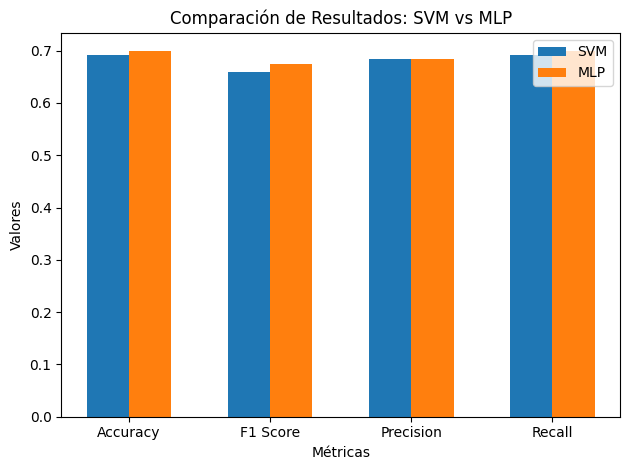

In [ ]:
# Datos
labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
svm_scores = [accuracy_svm, f1_svm, precision_svm, recall_svm]
mlp_scores = [accuracy_mlp, f1_mlp, precision_mlp, recall_mlp]

x = np.arange(len(labels))  # ubicación de las etiquetas
width = 0.3  # ancho de las barras

# Crear la gráfica
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, svm_scores, width, label='SVM')
bars2 = ax.bar(x + width/2, mlp_scores, width, label='MLP')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Resultados: SVM vs MLP')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Los resultados que queremos comparar entre SVM y MLP son los siguientes:

SVM:

  * Accuracy: 0.6913
  * F1 Score: 0.6592
  * Precision: 0.6851
  * Recall: 0.6913

MLP:

  * AAccuracy: 0.6992
  * F1 Score: 0.6753
  * Precision: 0.6849
  * Recall: 0.6992


MLP tiene un rendimiento ligeramente mejor que SVM en todas las métricas: accuracy, F1 Score, precision, y recall.
MLP se destaca especialmente en accuracy (69.92% vs 69.13%) y recall, lo que indica que tiene un mejor rendimiento general, aunque la diferencia no es muy grande.

### Conclusión

A lo largo de los análisis y comparaciones realizados con los modelos SVM y MLP, se pueden extraer varias conclusiones clave sobre el rendimiento de los modelos y las métricas que hemos evaluado. Aquí te presento un resumen de las principales conclusiones:
1. Rendimiento Comparativo entre SVM y MLP:

  * MLP mostró un rendimiento ligeramente superior en comparación con SVM en términos de todas las métricas evaluadas, incluida la accuracy, F1 Score, precision, y recall.
    
  * La accuracy de MLP fue del 69.92% en comparación con el 69.13% de SVM, lo que refleja un mejor ajuste global del modelo de red neuronal (MLP).
    
  * MLP también superó a SVM en el F1 Score (0.6753 vs. 0.6592), lo que sugiere que MLP tiene un mejor equilibrio entre precisión y recall.
  
  * En resumen, aunque MLP no está muy por delante de SVM, su rendimiento superior en todas las métricas indica que es más efectivo en este conjunto de datos.

2. Desempeño de MLP por Clase:

  * Aunque el modelo MLP tuvo un rendimiento global bueno (70% de accuracy), mostró un desequilibrio en el manejo de las clases, particularmente en la clase 3 (riesgo alto). No pudo predecir ninguna instancia correctamente en esta clase, lo que resultó en un F1 Score de 0.00 para la clase 3.
    
  * El buen desempeño de MLP en las clases 1 (riesgo bajo) y 2 (riesgo medio), con mejores métricas en recall y precisión, indica que el modelo está sesgado hacia las clases más representadas.
    
  * Esto sugiere que el desbalance de clases es un problema clave que afecta el rendimiento del modelo, especialmente en la clase de riesgo alto, que tiene muy pocas instancias (solo 14).

3. Necesidad de Manejar el Desbalance de Clases:

  * Tanto en SVM como en MLP, el desempeño en la clase 3 (riesgo alto) fue muy pobre, probablemente debido a la baja representación de esta clase en los datos.
    
  * Técnicas de balanceo de clases como SMOTE (Synthetic Minority Over-sampling Technique) o sobremuestreo de la clase minoritaria deberían implementarse para mejorar la capacidad de ambos modelos para identificar correctamente las clases con menor representación.
  
  * El uso de estas técnicas mejoraría el recall y precisión en las clases menos representadas, lo que equilibraría el rendimiento global del modelo.

4. Ajuste de Hiperparámetros y Arquitectura:

  * En el caso de MLP, se observó que la arquitectura con 100 neuronas en una capa oculta y la función de activación tanh fue la más efectiva. Esto demuestra que una arquitectura relativamente simple puede ser suficiente para capturar patrones importantes en los datos.
    
  * Además, se observó que el optimizador adam y una tasa de aprendizaje constante permitieron una rápida convergencia y un buen rendimiento.

  * Si bien la configuración actual es eficaz, el ajuste de otros hiperparámetros (por ejemplo, más capas ocultas o más iteraciones) podría llevar a una mejora adicional en el rendimiento.

5. Interpretación de Métricas y Balance entre Precisión y Recall:

  * El análisis del F1 Score, la precisión, y el recall muestra que MLP tiene un mejor balance que SVM entre evitar falsos positivos y captar verdaderos positivos.
    
  * Sin embargo, el F1 Score más bajo que el accuracy sugiere que el modelo tiene dificultades para equilibrar perfectamente la precisión y el recall, lo que puede deberse a la naturaleza de los datos o la distribución de clases.
    
  * En general, MLP es más consistente que SVM en su rendimiento, pero sigue habiendo margen para mejorar el equilibrio entre falsos positivos y falsos negativos, especialmente en clases minoritarias.

Conclusión Global:

**MLP** es, en general, el modelo más adecuado para este problema de clasificación, con un rendimiento ligeramente superior al de SVM en términos de precisión global y F1 Score.
    
El principal desafío identificado es el desbalance de clases, que afecta el rendimiento de ambos modelos, particularmente en la clase 3 (riesgo alto). Es necesario abordar este problema utilizando técnicas de balanceo de clases para garantizar que el modelo sea más robusto y tenga un rendimiento consistente en todas las clases.
  
Finalmente, tanto SVM como MLP muestran que es posible mejorar el rendimiento con ajustes adicionales en los hiperparámetros o la arquitectura de la red, y explorando otras técnicas de preprocesamiento y manejo de clases desbalanceadas.